## Variations of Gradient Descent:
1. Gradient Descent
2. Stochastic Gradient Descent
3. Mini batch

Computation of gradients is expensive, as we have to iterate over all the training data. So if training data is huge, it will take a lot of time to update even one theta

### 1. Mini batch
We approximate the gradient. We divide training dataset into batches, and compute gradient by iterating over batch. Gradient of entire dataset is approximated by calculating the gradient of a batch

**Algorithm:**
- Batch size = r
- Total training examples = m<br><br>
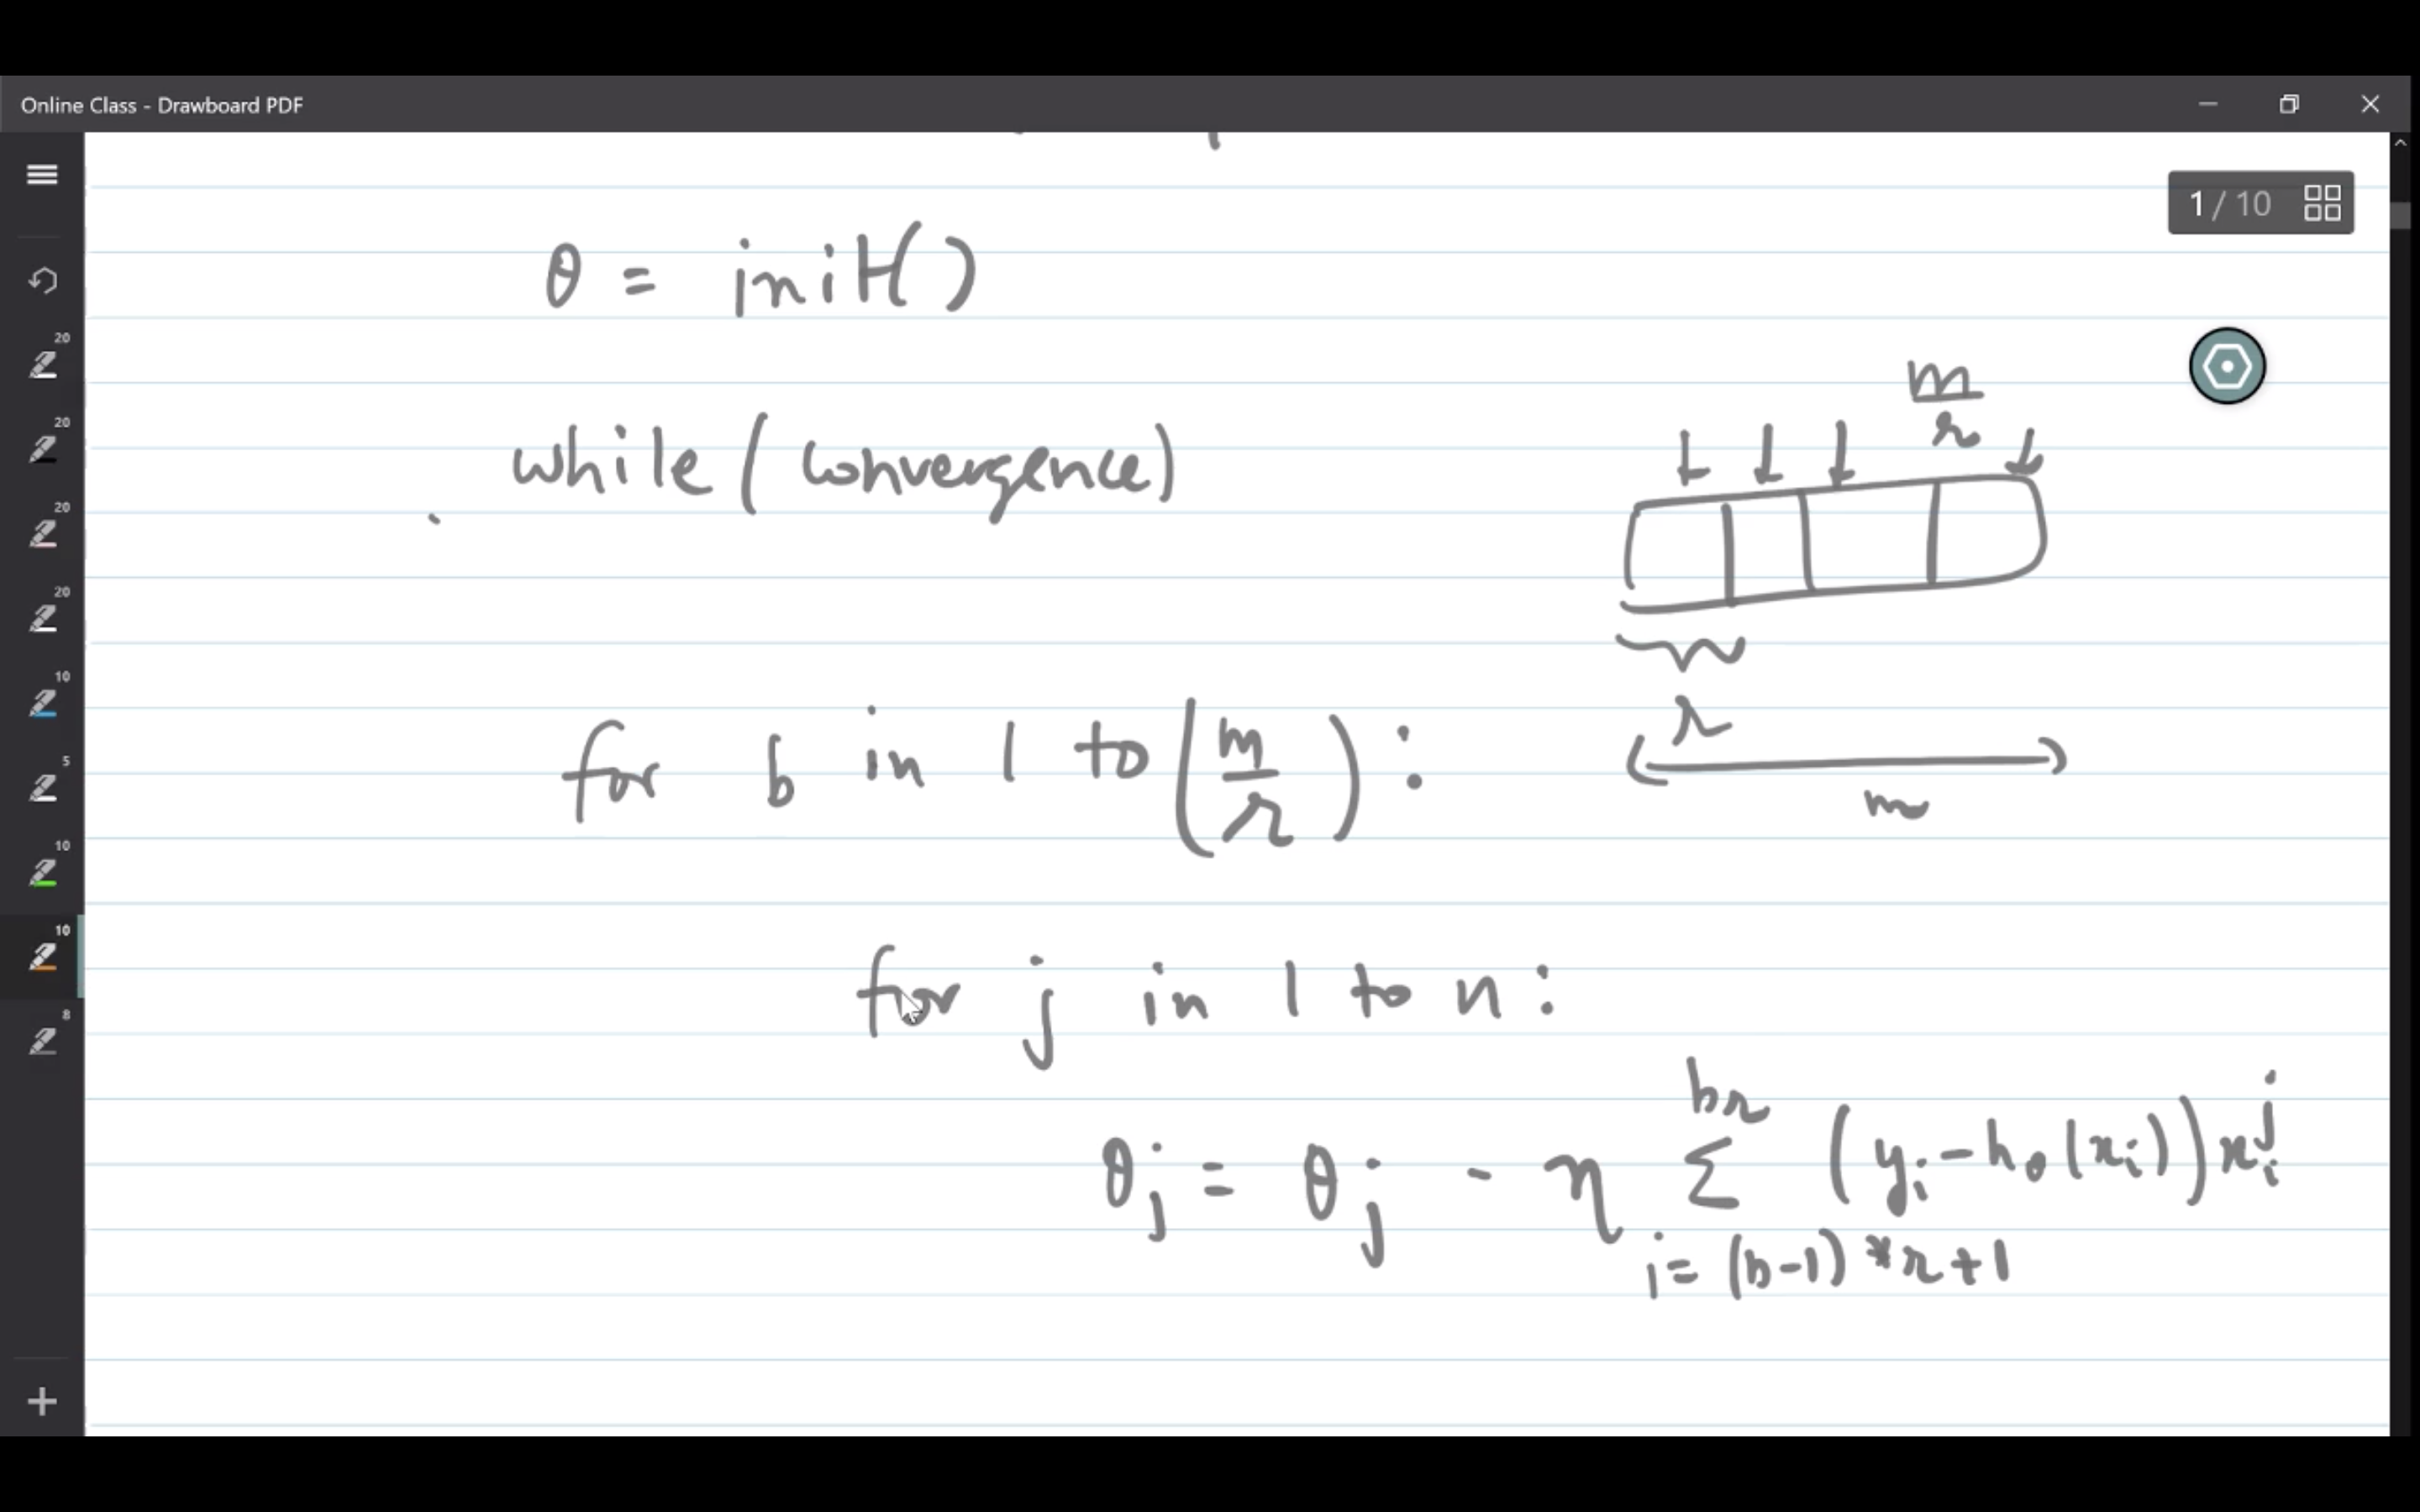


### 2. Stochastic GD
- When batch size = 1
- Gradient is approximated using only one example, it is called stochastic gradient descent



<br>

- Batch size = 1 => Stochastic
- Batch size = k => Mini batch

## Convergence Criteria
- Now we cannot use ∆E ≈ 0 as convergence criteria as error can increase or decrease
- So we calculate average error over last k epochs
- If change in average error over last k epochs < threshold, we can say our algorithm has converged

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

In [31]:
x, y = make_regression(n_features=1, n_samples=5000, bias=4, noise=15)

x = x.reshape((-1,))
y = y.reshape((-1,))
print(x.shape, y.shape)

x = (x-x.mean())/x.std()

(5000,) (5000,)


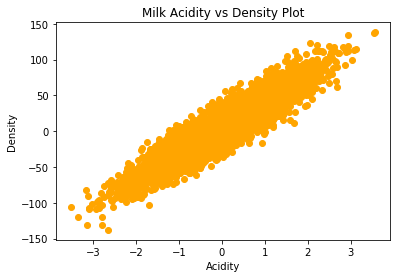

In [32]:
plt.scatter(x, y, color='orange')
plt.xlabel("Acidity")
plt.ylabel("Density")
plt.title("Milk Acidity vs Density Plot")
plt.show()

In [39]:
def hypothesis(x, theta):
    return theta[0] + theta[1]*x

def error(X, Y, theta):
    m = X.shape[0]
    total_e = 0
    for i in range(m):
        hx = hypothesis(X[i], theta)
        total_e += (Y[i] - hx)**2
    return total_e/2

def grad(X, Y, theta):
    m = X.shape[0]
    grad = np.zeros((2,))
    
    for i in range(m):
        hx = hypothesis(X[i], theta)
        grad[0] += (hx - Y[i])
        grad[1] += (hx - Y[i])*X[i]
        
    return grad

def batch_grad(X, Y, theta, bsize=1):
    m = X.shape[0]
    indices = np.arange(m)
    np.random.shuffle(indices)    # Randomly shuffle indices
    
    indices = indices[: bsize]    # Randomly choose any bsize indices
    grad = np.zeros((2,))
    
    for i in indices:             # Not range, as index values are random 
        hx = hypothesis(X[i], theta)
        grad[0] += (hx-Y[i])
        grad[1] += (hx-Y[i])*X[i]
        
    return grad

def gradientDescent(X, Y, learning_rate=0.01):
    theta = np.array(np.random.randn(2,))
#     theta = np.zeros((2,))
    error_list = []
    J = 0
    i=0
    while i <= 500:
        e = error(X, Y, theta)
        if i%10:
            error_list.append(e)
        grad = batch_grad(X, Y, theta)
        theta = theta - learning_rate*grad
        i += 1
        
    return theta, error_list        

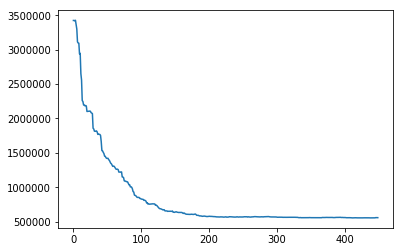

In [40]:
final_theta, error_list = gradientDescent(x, y)
plt.plot(error_list)
plt.show()

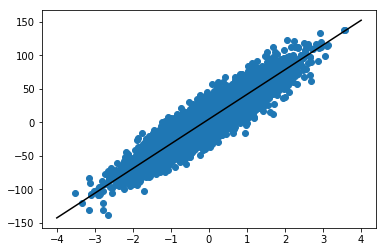

In [41]:
x_coord = np.linspace(-4,4,10)
y_coord = hypothesis(x_coord, final_theta)

plt.scatter(x, y)
plt.plot(x_coord, y_coord, color='black')